In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
july_df = pd.read_csv("../nasa_data/sessionized_data/sessionize_date_july.csv")
july_df.head()

G:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ipaddress,date,time,webpage,bytes_recv,datetime,unix_timestamp,session_id
0,***.novo.dk,11/Jul/1995,08:17:09,/ksc.html,7067,1995-07-11 08:17:09,805450629,1.0
1,***.novo.dk,11/Jul/1995,08:17:48,/shuttle/missions/missions.html,8678,1995-07-11 08:17:48,805450668,1.0
2,***.novo.dk,11/Jul/1995,08:21:05,/shuttle/missions/sts-35/mission-sts-35.html,12118,1995-07-11 08:21:05,805450865,1.0
3,***.novo.dk,11/Jul/1995,08:21:19,/shuttle/missions/sts-35/mission-sts-35.html,12118,1995-07-11 08:21:19,805450879,1.0
4,***.novo.dk,11/Jul/1995,08:23:01,/shuttle/resources/orbiters/columbia.html,6922,1995-07-11 08:23:01,805450981,1.0


In [40]:
unique_pages = np.unique(july_df["webpage"].values)
len(unique_pages)


1832

In [4]:
total_pages = july_df["webpage"].shape[0]
total_pages

533770

In [5]:
ratio_unique_to_total =  len(unique_pages)/total_pages
ratio_unique_to_total

0.0034321898945238586

## There are 1832 unique pages / 533770 total pages - which is good for association analysis

In [51]:
july_grouped_df = july_df.groupby("session_id").size().reset_index()

In [52]:
july_grouped_df.columns = ["session_id", "num_page_views"]
july_grouped_df.head()

,session_id,num_page_views
0,1.0,5
1,2.0,9
2,3.0,5
3,4.0,1
4,5.0,1


G:\anaconda\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


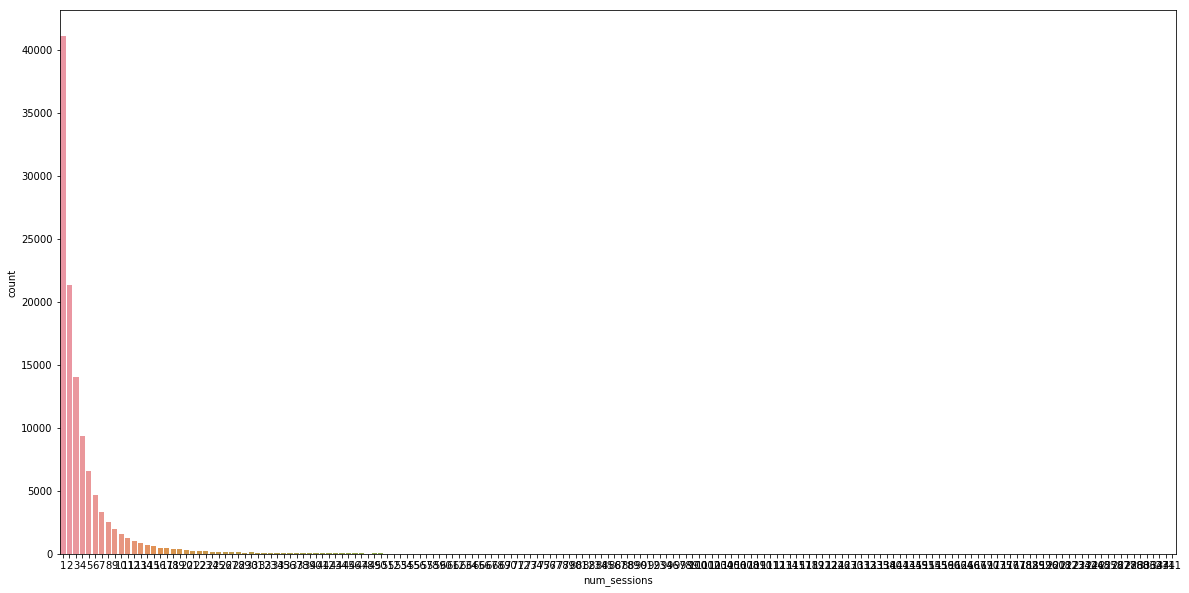

In [8]:
matplotlib.rcParams['figure.figsize'] = [20, 10]
sns.countplot(x="num_sessions", data=july_grouped_df)

In [9]:
july_df["datetime"].head()

0    1995-07-11 08:17:09
1    1995-07-11 08:17:48
2    1995-07-11 08:21:05
3    1995-07-11 08:21:19
4    1995-07-11 08:23:01
Name: datetime, dtype: object

In [10]:
july_df['date'] = july_df['datetime'].str.split(' ',expand=True)[0]
july_df["date"] = pd.to_datetime(july_df["date"], format="%Y-%m-%d")
july_df["date"].head()

0   1995-07-11
1   1995-07-11
2   1995-07-11
3   1995-07-11
4   1995-07-11
Name: date, dtype: datetime64[ns]

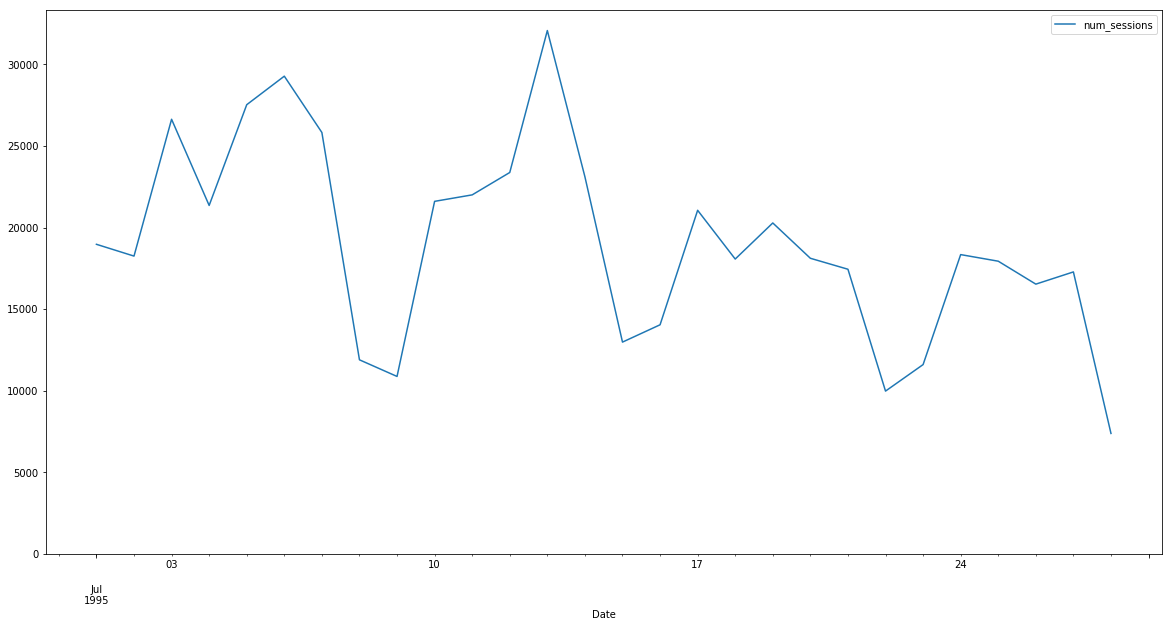

In [14]:
july_grouped_df = july_df.groupby(by="date").size().reset_index()
july_grouped_df.columns = ["Date", "num_sessions"]
july_grouped_df.plot(x="Date", y="num_sessions", ylim=0)

## Jul 13, 1995 was the launch day of STS 70 - https://en.wikipedia.org/wiki/STS-70

In [28]:
july_13_df = july_df[july_df["date"]=="1995-07-13"]
july_13_df["webpage"].head()

112                                       /ksc.html
176                       /shuttle/missions/sts-70/
177    /shuttle/missions/sts-70/mission-sts-70.html
178                                       /ksc.html
179                 /shuttle/countdown/liftoff.html
Name: webpage, dtype: object

In [29]:
from wordcloud import WordCloud
july_13_webpages = july_13_df["webpage"].values


In [30]:
july_13_webpages.shape

(32065,)

In [31]:
july_13_webpages[:5]

array(['/ksc.html', '/shuttle/missions/sts-70/',
       '/shuttle/missions/sts-70/mission-sts-70.html', '/ksc.html',
       '/shuttle/countdown/liftoff.html'], dtype=object)

(-0.5, 399.5, 199.5, -0.5)

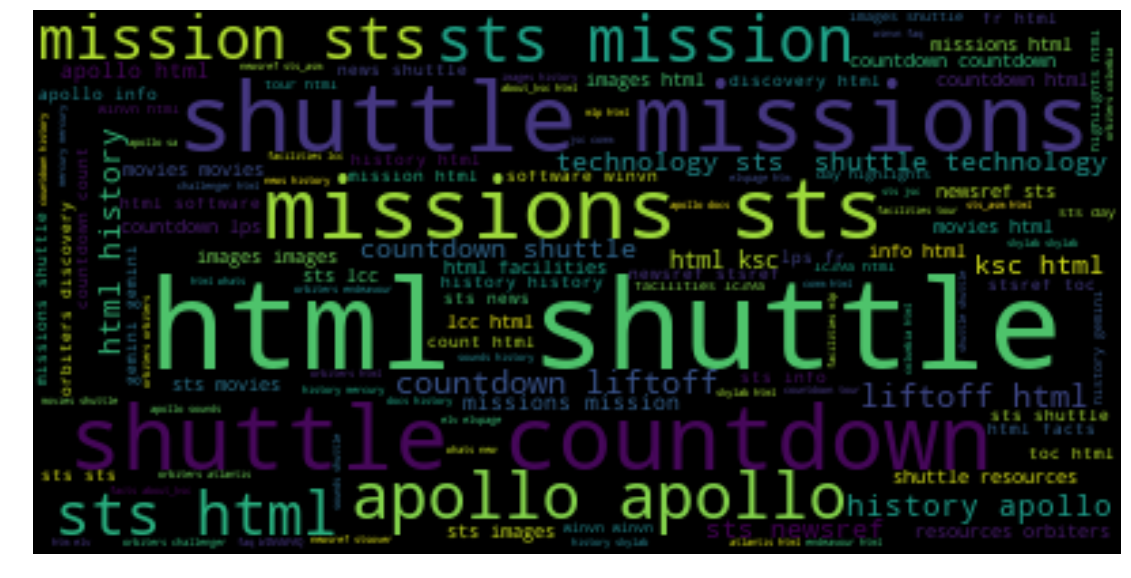

In [32]:
july_13_webpages = july_13_webpages.astype(str)
july_13_webpages_text = " ".join(july_13_webpages)
# Generate a word cloud image
wordcloud = WordCloud().generate(july_13_webpages_text)

import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [38]:
july_13_webpages_grouped = july_13_df.groupby(by="webpage").size().reset_index()
july_13_webpages_grouped.columns = ["webpage", "num_views"]
july_13_webpages_grouped = july_13_webpages_grouped.sort_values(by="num_views", ascending=False)
july_13_webpages_grouped.head(10)

,webpage,num_views
372,/shuttle/countdown/liftoff.html,3772
366,/shuttle/countdown/,2710
291,/ksc.html,2088
615,/shuttle/missions/sts-70/mission-sts-70.html,1952
0,/,1525
462,/shuttle/missions/missions.html,1307
617,/shuttle/missions/sts-70/movies/movies.html,1037
369,/shuttle/countdown/countdown.html,1031
613,/shuttle/missions/sts-70/images/images.html,966
737,/shuttle/technology/sts-newsref/sts-lcc.html,740


In [15]:
august_df = pd.read_csv("../nasa_data/sessionized_data/sessionize_date_aug.csv")
august_df.head()

G:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ipaddress,date,time,webpage,bytes_recv,datetime,unix_timestamp,session_id
0,***.novo.dk,09/Aug/1995,03:02:48,/shuttle/missions/sts-69/mission-sts-69.html,11264,1995-08-09 03:02:48,807937368,1.0
1,***.novo.dk,09/Aug/1995,03:03:52,/shuttle/countdown/,4673,1995-08-09 03:03:52,807937432,1.0
2,***.novo.dk,09/Aug/1995,03:05:38,/shuttle/countdown/liftoff.html,4665,1995-08-09 03:05:38,807937538,1.0
3,***.novo.dk,09/Aug/1995,03:07:40,/shuttle/countdown/lps/fr.html,1879,1995-08-09 03:07:40,807937660,1.0
4,001.msy4.communique.net,30/Aug/1995,02:55:47,/software/winvn/winvn.html,9630,1995-08-30 02:55:47,809751347,2.0


In [16]:
unique_pages_aug = np.unique(august_df["webpage"].values)
len(unique_pages_aug)

1780

In [17]:
august_df['date'] = august_df['datetime'].str.split(' ',expand=True)[0]
august_df["date"] = pd.to_datetime(august_df["date"], format="%Y-%m-%d")
august_df["date"].head()

0   1995-08-09
1   1995-08-09
2   1995-08-09
3   1995-08-09
4   1995-08-30
Name: date, dtype: datetime64[ns]

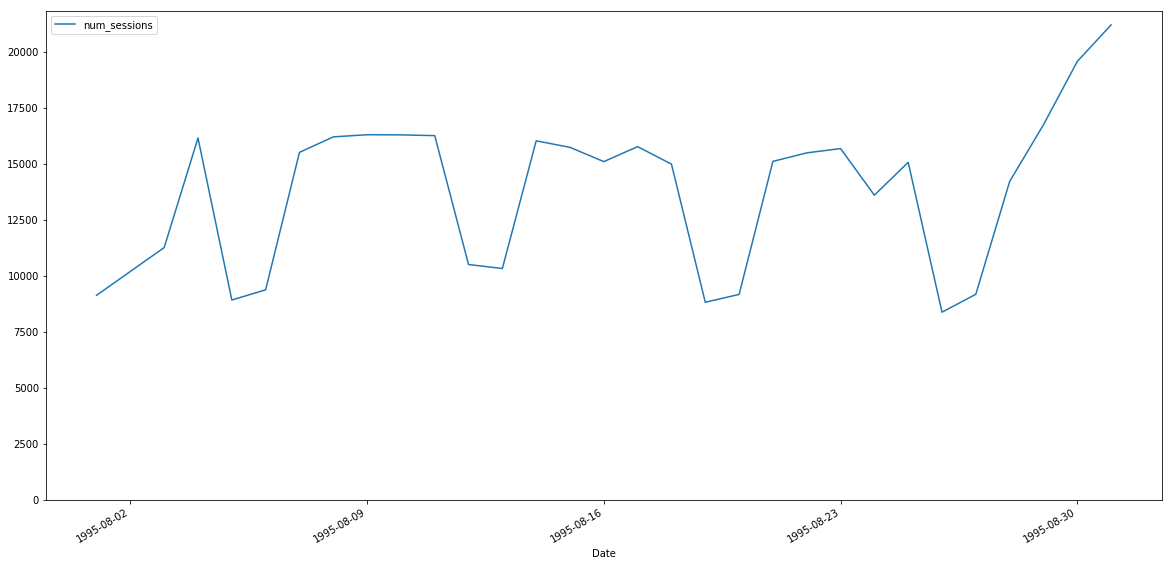

In [18]:
aug_grouped_df = august_df.groupby(by="date").size().reset_index()
aug_grouped_df.columns = ["Date", "num_sessions"]
aug_grouped_df.plot(x="Date", y="num_sessions", ylim=0)

In [41]:
unique_pages_aug[:5]

array(['/', '//', '//facilities/spaceport.html', '//facts/about_ksc.html',
       '//history/apollo/apollo.html'], dtype=object)

In [43]:
unique_pages_aug = list(unique_pages_aug)
unique_pages = list(unique_pages)

total_unique_pages = unique_pages_aug
total_unique_pages.extend(unique_pages)

total_unique_pages = set(total_unique_pages)

len(total_unique_pages)

2062

In [44]:
july_df.shape

(533770, 8)

In [45]:
august_df.shape

(416080, 8)

In [46]:
july_df.shape[0] + august_df.shape[0]

949850

In [47]:
july_df.head()

,ipaddress,date,time,webpage,bytes_recv,datetime,unix_timestamp,session_id
0,***.novo.dk,1995-07-11,08:17:09,/ksc.html,7067,1995-07-11 08:17:09,805450629,1.0
1,***.novo.dk,1995-07-11,08:17:48,/shuttle/missions/missions.html,8678,1995-07-11 08:17:48,805450668,1.0
2,***.novo.dk,1995-07-11,08:21:05,/shuttle/missions/sts-35/mission-sts-35.html,12118,1995-07-11 08:21:05,805450865,1.0
3,***.novo.dk,1995-07-11,08:21:19,/shuttle/missions/sts-35/mission-sts-35.html,12118,1995-07-11 08:21:19,805450879,1.0
4,***.novo.dk,1995-07-11,08:23:01,/shuttle/resources/orbiters/columbia.html,6922,1995-07-11 08:23:01,805450981,1.0


G:\anaconda\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


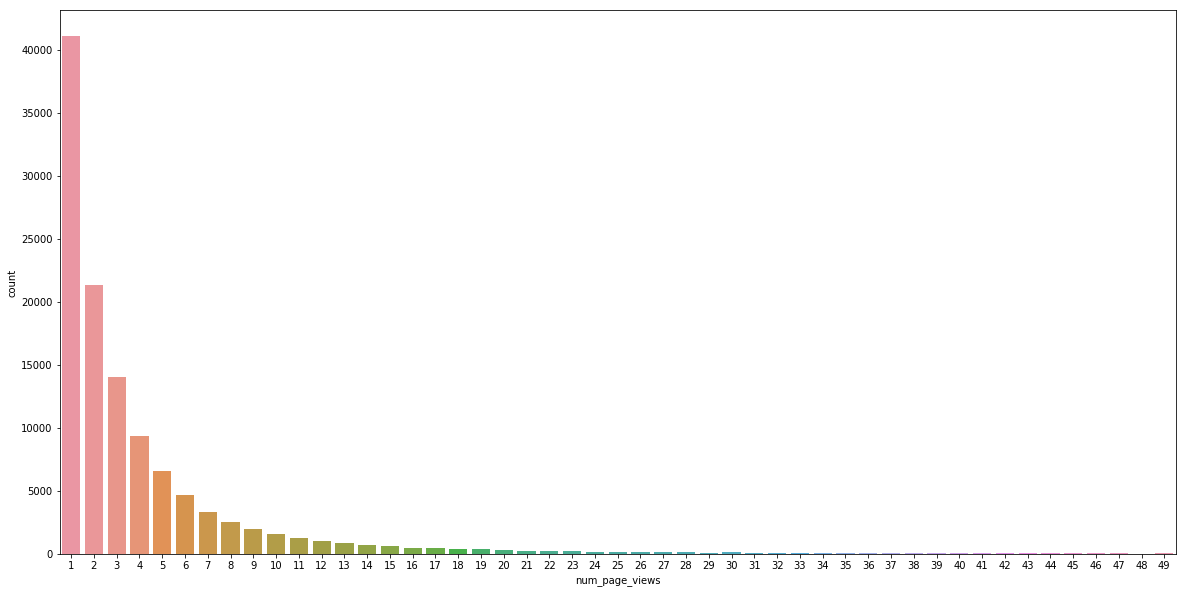

In [56]:
july_grouped_plot_df = july_grouped_df[july_grouped_df["num_page_views"] < 50]
sns.countplot(x="num_page_views", data=july_grouped_plot_df)